In [1]:
#Concept of Textblob
from textblob import TextBlob

In [2]:
review = 'Camera quality is not very good'
review1 = 'camera have excellent features'

In [3]:
analysis = TextBlob(review1) 

In [4]:
analysis.polarity

1.0

### Sentimental Analysis on Twitter Data
    - To find out the positive vs negitive tweet

In [7]:
import re 
import tweepy #!pip install tweepy
from tweepy import OAuthHandler  # twitter app authentication

from textblob import TextBlob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Get the below strings/api codes from developer.twitter.com
# Step 1: Login to twitter and visit the developer site
# Step 2 : Navigate to "Create a new App"
# Step 3 : fill the details accordingly
# Step 4 : api keys are now generated
# keys and tokens from the Twitter Dev Console 

consumer_key = 'VJFZEdGk7cyzbbKVPaPaAIPgs'
consumer_secret = 'WcA3PZ0ZYNuad524X3qUx97ExiEmI0gULZ3JcMMwmxn920xxC7'
access_token = '3257684406-kh5gJuLncLMe9o1kQVKS60FH47XmITXMUgo4qmB'
access_token_secret = 'BPg3GA7pSj86qvFqzmCXPCBGQeaSuPXRKdkP2UC1W85A1'

In [9]:
# attempt authentication 

# create OAuthHandler object 
auth = OAuthHandler(consumer_key, consumer_secret) 
    
# set access token and secret 
auth.set_access_token(access_token, access_token_secret) 
    
# create tweepy API object to fetch tweets 
api = tweepy.API(auth,wait_on_rate_limit=True) #wait_on_rate_limit need to be True becoz connection should not be disconnected 
                                                #even if data is not loading 

In [10]:
# 1. removing @username
# 2. tabs 
# 3. non words and other spaces
def clean_tweet(tweet): 
    ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split()) 

#re.sub is removing the special char starting from @, number or symbol. basically we are removing all apart from text

In [11]:
# Using text blob from above, we calculate the polarity score
# textblob has a corpus of positive, negative and neutral words
# It checks for the presence of these words in the document and calculates the overall
# polarity

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [12]:
# empty list to store parsed tweets 
tweets = [] 

# call twitter api to fetch tweets 
# count = 20
# The number of tweets to return per page, up to a maximum of 100. 
# Defaults to 15.
# This restriction is due to a security update from the Twitter API
# We will get rid of this limitation using the new 
# tweepy.Cursor() method

#fetched_tweets = api.search(q = "chidambaram", count = 100) #here we have limit count 100
fetched_tweets=tweepy.Cursor(api.search,q="NationalYouthDay").items(1000) #here we dont have limt, we can search more than 100 count

# parsing tweets one by one 
for tweet in fetched_tweets: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 

    # saving text of tweet 
    parsed_tweet['text'] = tweet.text

    
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet=clean_tweet(tweet.text)) 

    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
        # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets: 
            tweets.append(parsed_tweet) 
    else: 
        tweets.append(parsed_tweet) 

In [14]:
#parsed_tweet

{'text': '#NationalYouthDay #SwamiVicekananda #BirthAnniversary #CafeBahar #Biryani #Authentic #Hyderabadi #Delicacies\n\nAll P… https://t.co/eTXhOR3xh3',
 'sentiment': 'positive'}

In [13]:
len(tweets)

34

In [15]:
tweets[0:10] #top ten tweet

[{'text': 'RT @Drpadamsingh12: युवाओं के प्रेरणास्रोत और पूरे विश्व में भारतीय संस्कृति और परंपरा का ज्ञान फैलाने वाले स्वामी विवेकानंद जी की जयंती पर…',
  'sentiment': 'neutral'},
 {'text': 'RT @Akanksh44854693: "Fill the brain with high thoughts ,highest ideals , place them day and night  before you, and out of that will come g…',
  'sentiment': 'positive'},
 {'text': "RT @NFAIOfficial: On the occasion of #SwamiVivekananda's birth anniversary today, we celebrate #NationalYouthDay with this joyful moment fr…",
  'sentiment': 'neutral'},
 {'text': 'RT @TheNameIsYash: ಮಾನ್ಯ ಉಪಮುಖ್ಯಮಂತ್ರಿಗಳಾದ @drashwathcn ರವರ ಈ ಅಭಿಯಾನವನ್ನು ಬೆಂಬಲಿಸುತ್ತಾ... #SwamijiQuotes campaign ನಲ್ಲಿ ಭಾಗಿಯಾಗಲು ಈ ಐವರನ್ನು…',
  'sentiment': 'neutral'},
 {'text': 'RT @iMonkJi: @hegdepooja Uttarayan festival is important in terms of physical, mental, intellectual and spiritual development.\n\nWith the in…',
  'sentiment': 'positive'},
 {'text': 'RT @SadhguruJV: The enormous potential of youth can be unleashed for the wellbei

In [16]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 

Positive tweets percentage: 26.470588235294116 %


In [17]:
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

Negative tweets percentage: 11.764705882352942 %


In [18]:
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 

Neutral tweets percentage: 61.76470588235294 %


In [19]:
df_tweets_cnt = pd.DataFrame(pd.concat([pd.Series(len(ptweets)), pd.Series(len(ntweets)), pd.Series( (len(tweets) - len(ntweets) - len(ptweets))) ],axis=0 ))
df_tweets_cnt.set_index(pd.Series(['ptweets', 'ntweets', 'nuetral_tweets']), inplace=True)
print(df_tweets_cnt)

                 0
ptweets          9
ntweets          4
nuetral_tweets  21


In [20]:
# printing first 10 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(clean_tweet(tweet['text'])) 



Positive tweets:
RT Fill the brain with high thoughts highest ideals place them day and night before you and out of that will come g
RT Uttarayan festival is important in terms of physical mental intellectual and spiritual developmentWith the in
RT The enormous potential of youth can be unleashed for the wellbeing of the world and it would have a tremendous impact if
RT Remembering the great scholar and philosopher Swami Vivekananda on his birth anniversary To all the young minds reading this
RT Ramakrishna Mission Ashrama Jalpaiguri celebrated National Youth Day 2020 on 12 Jan 2020Report and Photos
RT Ramakrishna Math Kochi Kerala celebrated National Youth Day at Swami Vivekanandas Statue at Ernakulam Boat jetty wher
RT The National Youth Day was celebrated by Ramakrishna Math and Ramakrishna Mission Karimganj on 12 January 2020 by way o
RT January 12th is celebrated as NationalYouthDay in India and the date also marks Swami Vivekanandas birthday youth
NationalYouthDay SwamiVicekana

In [21]:
# printing first 10 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 



Negative tweets:
RT @SadhguruJV: To be spiritual has always been understood as to also be gentle, which has always been misinterpreted as weakness. The weak…
RT @SatlokChannel: #SaturdayMotivation
Provocative and vulgar movies are corrupting the youth. 
To give right values to the children, Satsa…
RT @ArshadRizwan: Be a Hero. Always say, I have no fear - #SwamiVivekananda

I pay my humble tributes to Swami Vivekananda on his Birth Ann…
RT @MohitBeniwalBJP: A man is not poor without a rupee 
but a man is really poor without a dream and ambition - “Swami Vivekanand”
स्वामी…


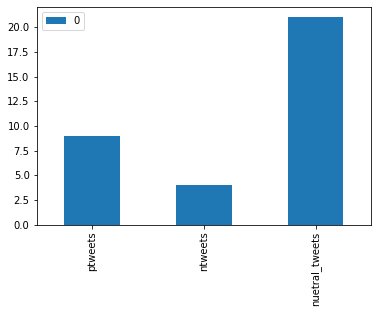

In [22]:
df_tweets_cnt.plot(kind='bar')